In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:


# Define bin edges (e.g., 100 bins between 0 and 100)
bins = np.linspace(0, 100, 101)  # 101 edges for 100 bins

# Define the bin contents (flat spectrum, value of 10000 for each bin)
bin_cont1 = np.full(len(bins)-1, 1000)  # One less than the number of bins because we have bin edges
bin_cont2 = np.full(len(bins)-1, 100) 
# Assuming you have a Spectrum class like this:
class Spectrum:
    def __init__(self, bins, bin_cont, xlabel="x", ylabel="Value"):
        self.bins = bins
        self.bin_cont = bin_cont
        self.xlabel = xlabel
        self.ylabel = ylabel

# Create the flat spectrum
spectrum1 = Spectrum(bins=bins, bin_cont=bin_cont1)
spectrum2 = Spectrum(bins=bins, bin_cont=bin_cont2)

In [2]:

# Define bin edges (e.g., 100 bins between 0 and 100)
bins = np.linspace(0, 100, 101)  # 101 edges for 100 bins
bin_centers = (bins[:-1] + bins[1:]) / 2  # Compute bin centers

# Define Gaussian parameters
mean1, std1, amplitude1 = 50, 10, 9000  # Mean, standard deviation, and amplitude for spectrum1
mean2, std2, amplitude2 = 60, 8, 1000  # Mean, standard deviation, and amplitude for spectrum2

# Define the bin contents using a Gaussian function
bin_cont1 = amplitude1 * np.exp(-0.5 * ((bin_centers - mean1) / std1) ** 2)
bin_cont2 = amplitude2 * np.exp(-0.5 * ((bin_centers - mean2) / std2) ** 2)

# Assuming you have a Spectrum class like this:
class Spectrum:
    def __init__(self, bins, bin_cont, xlabel="x", ylabel="Value"):
        self.bins = bins
        self.bin_cont = bin_cont
        self.xlabel = xlabel
        self.ylabel = ylabel

# Create the Gaussian spectra
spectrum1 = Spectrum(bins=bins, bin_cont=bin_cont1)
spectrum2 = Spectrum(bins=bins, bin_cont=bin_cont2)


In [3]:
def compute_chi2(observed, expected):
    return np.sum((observed - expected) ** 2 / expected)

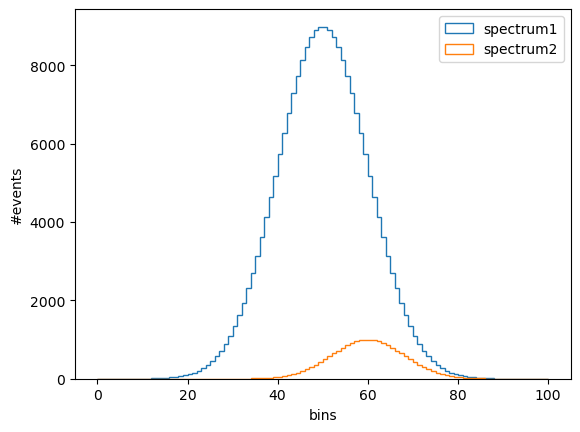

In [4]:
plt.hist(spectrum1.bins[:-1], weights=spectrum1.bin_cont, bins=spectrum1.bins, fill=False, histtype='step', label='spectrum1')
plt.hist(spectrum2.bins[:-1], weights=spectrum2.bin_cont, bins=spectrum2.bins, fill=False, histtype='step', label='spectrum2')
plt.ylabel('#events')
plt.xlabel('bins')
plt.legend()
plt.show()

In [11]:
total = Spectrum(bins=bins, bin_cont=spectrum1.bin_cont + spectrum2.bin_cont)
toy1 = np.zeros(100)
toy2 = np.zeros(100)
chi2_1 = np.zeros(10000)
chi2_2 = np.zeros(10000)
chi2_rel = np.zeros(10000)
sum_1 = np.zeros(10000)
sum_2 = np.zeros(10000)
for i in range(10000):
    meth1 = np.random.poisson(total.bin_cont)
    meth2 = np.random.poisson(spectrum1.bin_cont) + np.random.poisson(spectrum2.bin_cont)
    chi2_1[i] = compute_chi2(meth1, total.bin_cont) 
    chi2_2[i] = compute_chi2(meth2, total.bin_cont)
    chi2_rel[i] = (chi2_1[i] - chi2_2[i])*100./chi2_1[i]
    sum_1[i] = np.sum(meth1)/np.sum(total.bin_cont)
    sum_2[i] = np.sum(meth2)/np.sum(total.bin_cont)
    toy1 += meth1
    toy2 += meth2

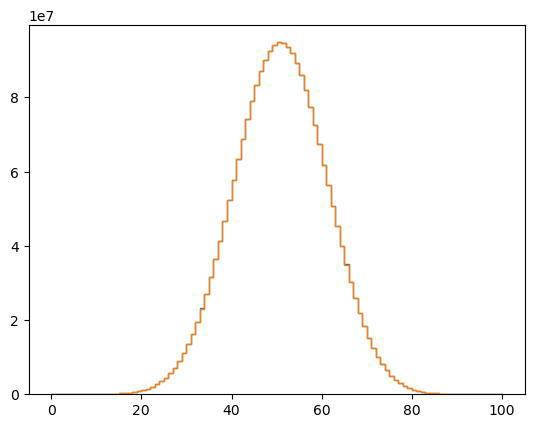

In [12]:
plt.hist(total.bins[:-1], weights=toy1, bins=total.bins, fill=False, histtype='step')
plt.hist(total.bins[:-1], weights=toy2, bins=total.bins, fill=False, histtype='step')
plt.show()

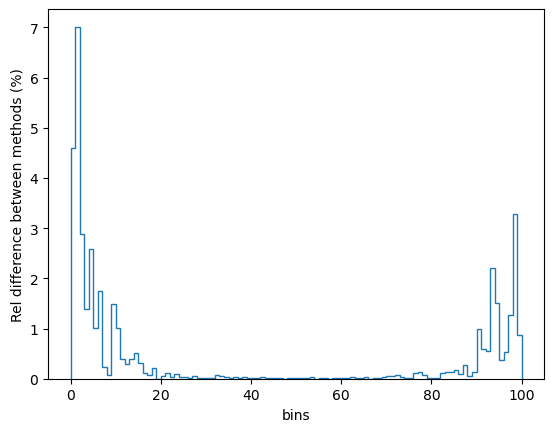

In [13]:
plt.hist(total.bins[:-1], weights=abs(toy2-toy1)*100/toy2, bins=total.bins, fill=False, histtype='step')
plt.ylabel('Rel difference between methods (%)')
plt.xlabel('bins')
plt.show()

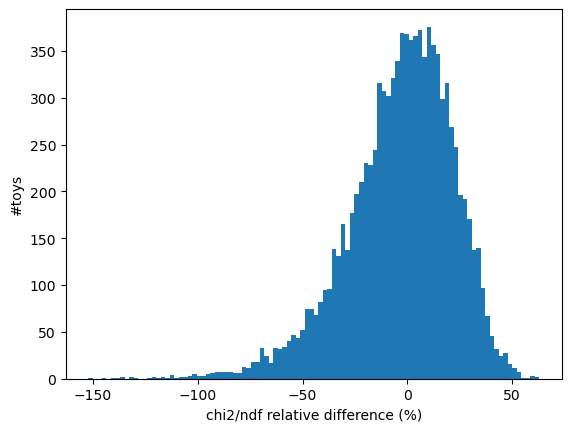

In [15]:
plt.hist(chi2_rel, bins=100)
plt.ylabel('#toys')
plt.xlabel('chi2/ndf relative difference (%)')
plt.show()

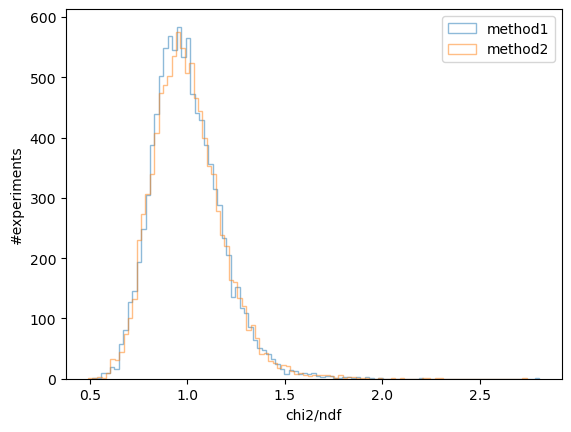

In [9]:
plt.hist(chi2_1/100., bins=100, alpha=0.5, histtype='step', label='method1')
plt.hist(chi2_2/100., bins=100, alpha=0.5, histtype='step', label='method2')
plt.xlabel('chi2/ndf')
plt.ylabel('#experiments')
plt.legend()
plt.show()

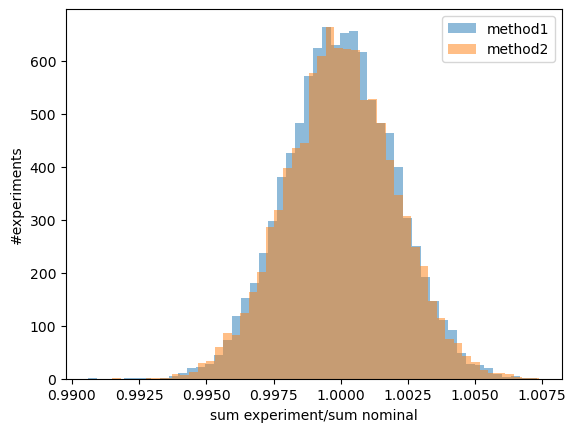

In [10]:
plt.hist(sum_1, bins=50, alpha=0.5, label='method1')
plt.hist(sum_2, bins=50, alpha=0.5, label='method2')
plt.ylabel('#experiments')
plt.xlabel('sum experiment/sum nominal')
plt.legend()
plt.show()